# Жилищные ценности в пригороде Бостона

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('homework.csv')
data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


## Описание данных
Этот фрейм данных содержит следующие столбцы: \
\
crim - уровень преступности на душу населения по городам. \
\
zn - доля жилой земли, зонированной для участков более 25 000 кв. футов. \
\
indus - доля не связанных с розничной торговлей акров на город. \
\
chas - фиктивная переменная реки Чарльз (= 1, если путь ограничивает реку; 0 в противном случае).\
\
nox - концентрация оксидов азота (частей на 10 млн.). \
\
rm - среднее количество комнат на жилое помещение. \
\
age - доля домов, построенных до 1940 года. \
\
dis - средневзвешенное расстояние до пяти бостонских центров занятости. \
\
rad - индекс доступности радиальных магистралей. \
\
tax - полная стоимость налога на имущество за 10 000 долларов США. \
\
ptratio - соотношение учеников и учителей по городам. \
\
black - 1000 (Bk - 0,63) ^ 2, где Bk - доля чернокожих по городам. \
\
lstat - более низкий статус населения (в процентах). \
\
medv - средняя стоимость домов, занимаемых владельцами, в $ 1000.

## Переменная medv является целевой переменной!

In [3]:
# Основные сведения о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [5]:
# Определяем количество выбросов
print('Количество выбросов в data: '+str(data.isnull().sum().sum()))

Количество выбросов в data: 0


In [9]:
# Статистика
data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [135]:
data.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [141]:
# Удалим колоноки, которые нам кажутся мало информативными
dataset = data[['crim', 'indus', 'rm', 'age', 'rad', 'tax', 'lstat', 'medv']]
dataset.head()

,crim,indus,rm,age,rad,tax,lstat,medv
0,0.00632,2.31,6.575,65.2,1,296,4.98,24.0
1,0.02731,7.07,6.421,78.9,2,242,9.14,21.6
2,0.03237,2.18,6.998,45.8,3,222,2.94,33.4
3,0.06905,2.18,7.147,54.2,3,222,5.33,36.2
4,0.08829,7.87,6.012,66.6,5,311,12.43,22.9


In [140]:
# Проверяем
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 8 columns):
crim     333 non-null float64
indus    333 non-null float64
rm       333 non-null float64
age      333 non-null float64
rad      333 non-null int64
tax      333 non-null int64
lstat    333 non-null float64
medv     333 non-null float64
dtypes: float64(6), int64(2)
memory usage: 20.9 KB


## Регрессия для нескольких переменных

In [188]:
# Выбираем модули для регрессии
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [212]:
# Формируем признаки и целевую переменную
X, y = dataset[['crim', 'indus', 'rm', 'age', 'rad', 'tax', 'lstat']], dataset['medv']

In [213]:
# Разделяем данные на данные для обучения и проверки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [214]:
# Приводим данные к одному масштабу
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Возвращаем тип DataFrame
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [215]:
# Выбираем тип регрессии для модели
modelL = LinearRegression()
# Обучаем нашу модель
modelL.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [216]:
# Оценим качество
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, modelL.predict(X_test)))

from sklearn.metrics import r2_score
print(r2_score(y_test, modelL.predict(X_test)))

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, modelL.predict(X_test)))

36.37056986195633
0.6508911163446367
4.386620261951318


In [194]:
# Выбираем тип регрессии для модели
modelCVR = SVR()
# Обучаем нашу модель
modelCVR.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [195]:
# Оценим качество
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, modelCVR.predict(X_test)))

from sklearn.metrics import r2_score
print(r2_score(y_test, modelCVR.predict(X_test)))

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, modelCVR.predict(X_test)))

54.1348516542285
0.5154828455644843
4.523126851059708


In [196]:
# Выбираем тип регрессии для модели
modelT = DecisionTreeRegressor()
# Обучаем нашу модель
modelT.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [197]:
# Оценим качество
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, modelT.predict(X_test)))

from sklearn.metrics import r2_score
print(r2_score(y_test, modelT.predict(X_test)))

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, modelT.predict(X_test)))

37.128499999999995
0.6676929072723545
4.114999999999998


## Регрессия для двух переменных

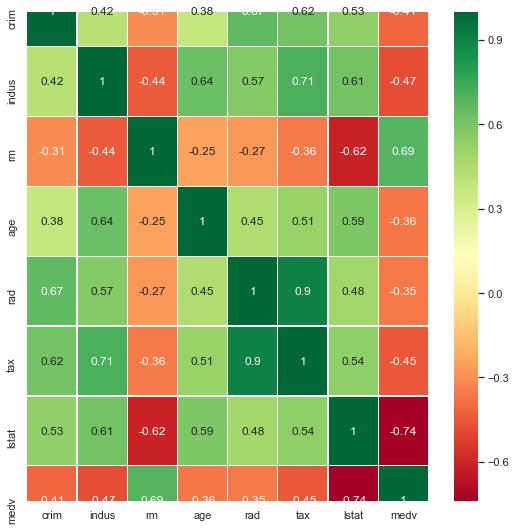

In [198]:
# Воспользуемся корреляцией для определения наиболее сильной линейной взаимосвязи между двумя переменными
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(9,9)
plt.show()

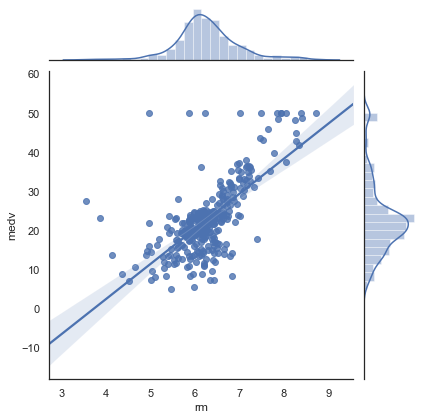

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Визуализируем эту взаимосвязь между переменными rm и medv
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=dataset['rm'], y=dataset['medv'], data=dataset, kind='reg')
plt.show()

In [218]:
# Выбираем модули для регрессии
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [6]:
dataset.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [225]:
# Формируем признаки и целевую переменную
X, y = dataset['rm'], dataset['medv']

In [226]:
# Приводим данные к одному масштабу
import numpy as np
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [227]:
# Разделяем данные на данные для обучения и проверки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [228]:
# Выбираем тип регрессии для модели
modelL = LinearRegression()
# Обучаем нашу модель
modelL.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [229]:
# Оценим качество
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, modelL.predict(X_test)))

from sklearn.metrics import r2_score
print(r2_score(y_test, modelL.predict(X_test)))

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, modelL.predict(X_test)))

38.51216204529777
0.4726150932359956
4.308093264613189


In [230]:
# Выбираем тип регрессии для модели
modelCVR = SVR()
# Обучаем нашу модель
modelCVR.fit(X_train, y_train)

C:\Users\Станислав\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [231]:
# Оценим качество
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, modelCVR.predict(X_test)))

from sklearn.metrics import r2_score
print(r2_score(y_test, modelCVR.predict(X_test)))

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, modelCVR.predict(X_test)))

34.19977714460685
0.5316688203704625
4.13560415687219


In [232]:
# Выбираем тип регрессии для модели
modelT = DecisionTreeRegressor()
# Обучаем нашу модель
modelT.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [233]:
# Оценим качество
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, modelT.predict(X_test)))

from sklearn.metrics import r2_score
print(r2_score(y_test, modelT.predict(X_test)))

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, modelT.predict(X_test)))

58.77880000000001
0.1950840900274784
5.654
